In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
import seaborn as sns

font = {'size'   : 13}

matplotlib.rc('font', **font)

In [3]:
ages_df = pd.read_csv("jd2019_table_4.csv", names=('Mode', 'LocID', 'Period_days', 'Age_PA', 'unc_Age_PA', 'Age_PAC', 'unc_Age_PAC', 'Age_rot'), skiprows=1)

In [4]:
ages_df

,Mode,LocID,Period_days,Age_PA,unc_Age_PA,Age_PAC,unc_Age_PAC,Age_rot
0,F,M1,1.1,283,59,271,63,567
1,F,M4,21.4,27,6,27,8,48
2,F,M7,1.6,209,44,207,50,410
3,F,M10,2.9,132,28,110,26,252
4,F,M11,16.4,34,8,35,10,59
5,1O,M5,2.0,120,20,123,22,297
6,1O,M6,3.2,74,13,79,15,191
7,1O,M12,1.0,252,41,279,50,576
8,1O,M13,0.5,519,84,475,77,1101
9,1O2O,M9,0.7,367,60,329,54,807


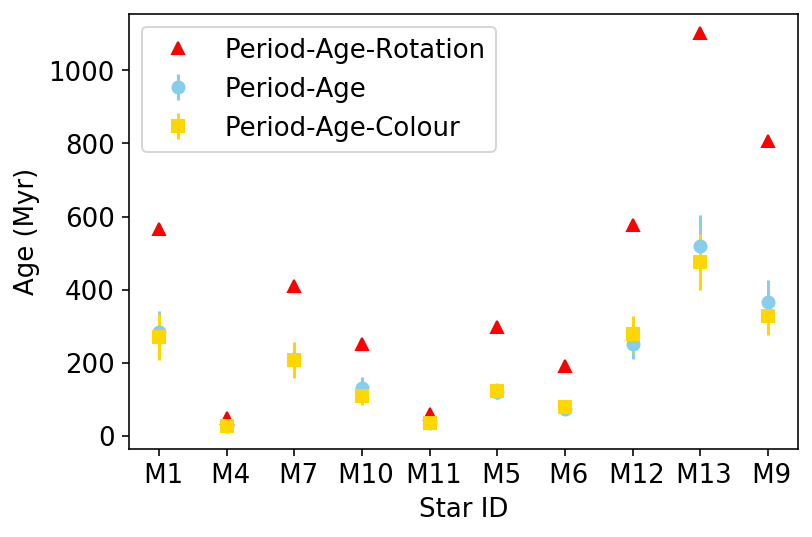

In [6]:
mp.errorbar(ages_df.LocID, ages_df.Age_PA, yerr=ages_df.unc_Age_PA, color='skyblue', marker='o', ls='None', label='Period-Age')
mp.errorbar(ages_df.LocID, ages_df.Age_PAC, yerr=ages_df.unc_Age_PAC, color='gold', marker='s', ls='None', label='Period-Age-Colour')
mp.plot(ages_df.LocID, ages_df.Age_rot, color='red', marker='^', ls='None', label='Period-Age-Rotation')
mp.xlabel('Star ID')
mp.ylabel('Age (Myr)')
mp.legend()

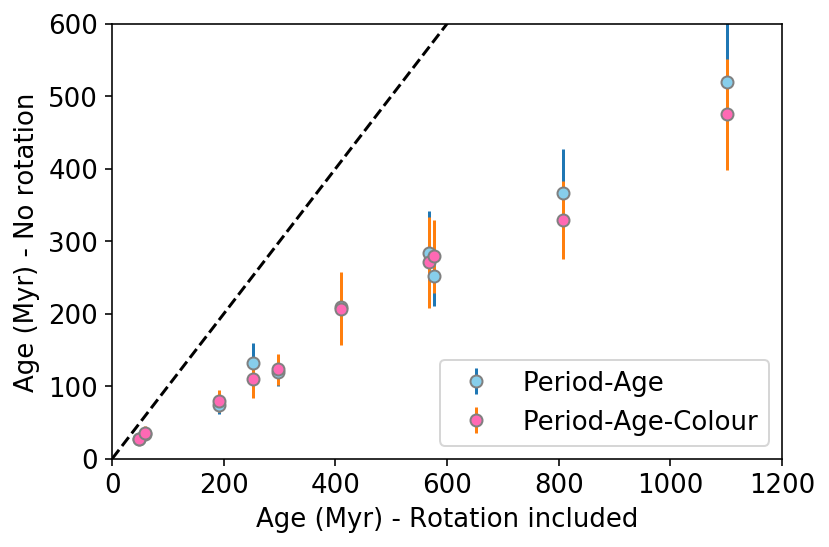

In [20]:
mp.errorbar(ages_df.Age_rot, ages_df.Age_PA, yerr=ages_df.unc_Age_PA, mfc='skyblue', mec='grey', marker='o', ls='None', label='Period-Age')
mp.errorbar(ages_df.Age_rot, ages_df.Age_PAC, yerr=ages_df.unc_Age_PAC, mfc='hotpink', mec='grey', marker='o', ls='None', label='Period-Age-Colour')
mp.xlabel('Age (Myr) - Rotation included')
mp.ylabel('Age (Myr) - No rotation')
xs = np.arange(0,1200)
mp.plot(xs, xs, 'k--')
myaxis=[0,1200,0,600]
mp.axis(myaxis)
mp.legend()


In [42]:
ages_df['PA_Age_diff'] = ages_df.Age_rot - ages_df.Age_PA
ages_df['PAC_Age_diff'] = ages_df.Age_rot - ages_df.Age_PAC
ages_df['PA_PAC_Age_diff'] = ages_df.Age_PAC - ages_df.Age_PA


Text(0, 0.5, '$\\Delta$ Age (Age$_{rot}$ - Age$_{PA(C)}$) (Myr)')

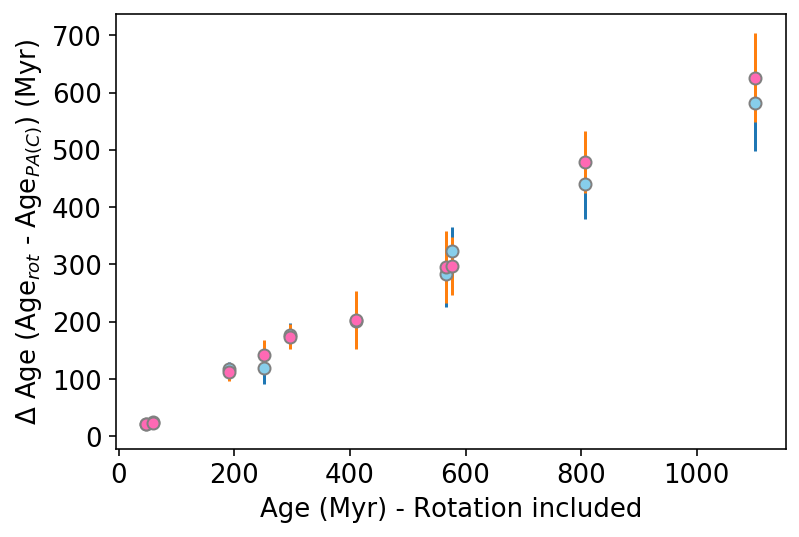

In [43]:
mp.errorbar(ages_df.Age_rot, ages_df.PA_Age_diff, yerr = ages_df.unc_Age_PA, mfc='skyblue', mec='grey', marker='o', ls='None', label='Period-Age')
mp.errorbar(ages_df.Age_rot, ages_df.PAC_Age_diff, yerr = ages_df.unc_Age_PAC, mfc='hotpink', mec='grey', marker='o', ls='None', label='Period-Age-Colour')
mp.xlabel('Age (Myr) - Rotation included')
mp.ylabel('$\Delta$ Age (Age$_{rot}$ - Age$_{PA(C)}$) (Myr)')


Text(0, 0.5, '$\\Delta$ Age (Age$_{PA}$ - Age$_{PAC}$) (Myr)')

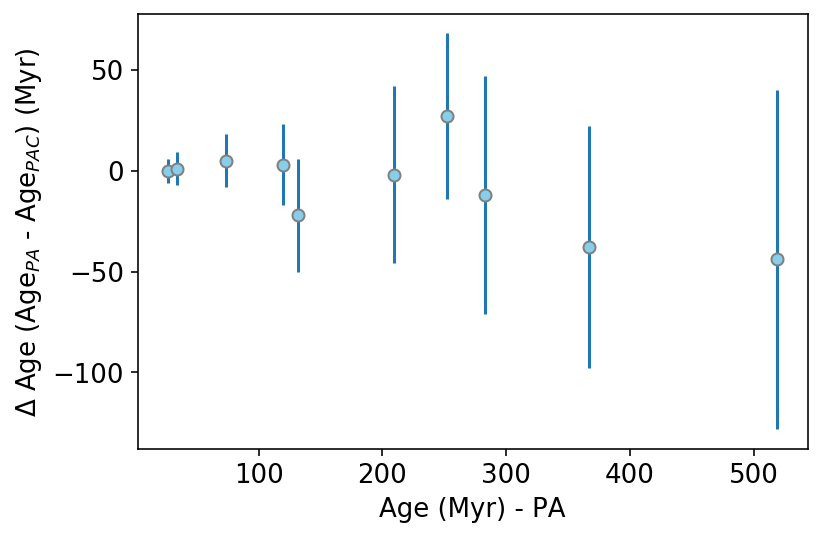

In [44]:
mp.errorbar(ages_df.Age_PA, ages_df.PA_PAC_Age_diff, yerr = ages_df.unc_Age_PA, mfc='skyblue', mec='grey', marker='o', ls='None', label='Period-Age')
mp.xlabel('Age (Myr) - PA')
mp.ylabel('$\Delta$ Age (Age$_{PA}$ - Age$_{PAC}$) (Myr)')

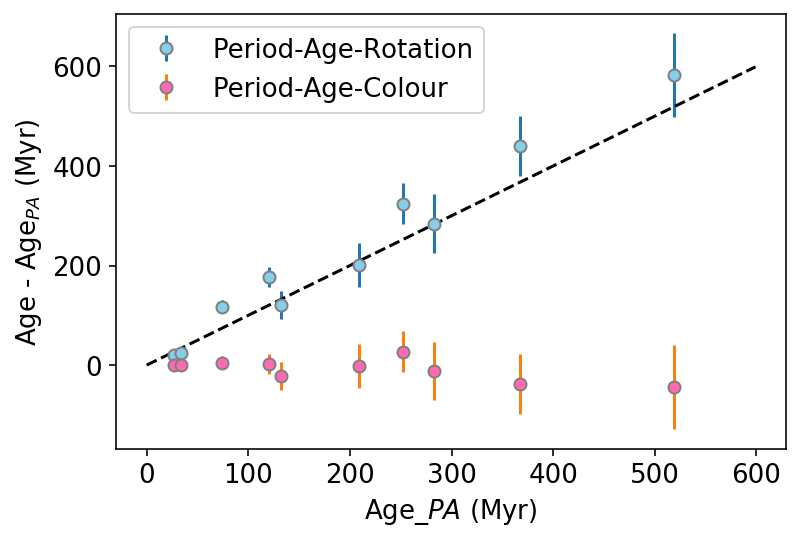

In [45]:
mp.errorbar(ages_df.Age_PA, ages_df.Age_rot - ages_df.Age_PA, yerr = ages_df.unc_Age_PA, mfc='skyblue', mec='grey', marker='o', ls='None', label='Period-Age-Rotation')
mp.errorbar(ages_df.Age_PA, ages_df.PA_PAC_Age_diff, yerr = ages_df.unc_Age_PA, mfc='hotpink', mec='grey', marker='o', ls='None', label='Period-Age-Colour')

mp.xlabel('Age_${PA}$ (Myr)')
mp.ylabel('Age - Age$_{PA}$ (Myr)')
xs = np.arange(0,600)
mp.plot(xs, xs, 'k--')
myaxis=[0,600,0,600]
mp.legend()


In [47]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,ages_df.Age_PA, ages_df.PA_Age_diff)
slope_rot = popt[0]
intercept_rot = popt[1]
err_slope_rot = np.sqrt(float(pcov[0][0]))
err_intercept_rot = np.sqrt(float(pcov[1][1]))

In [48]:
popt, pcov = curve_fit(line,ages_df.Age_PA, ages_df.PA_PAC_Age_diff)
slope_pac = popt[0]
intercept_pac = popt[1]
err_slope_pac = np.sqrt(float(pcov[0][0]))
err_intercept_pac = np.sqrt(float(pcov[1][1]))

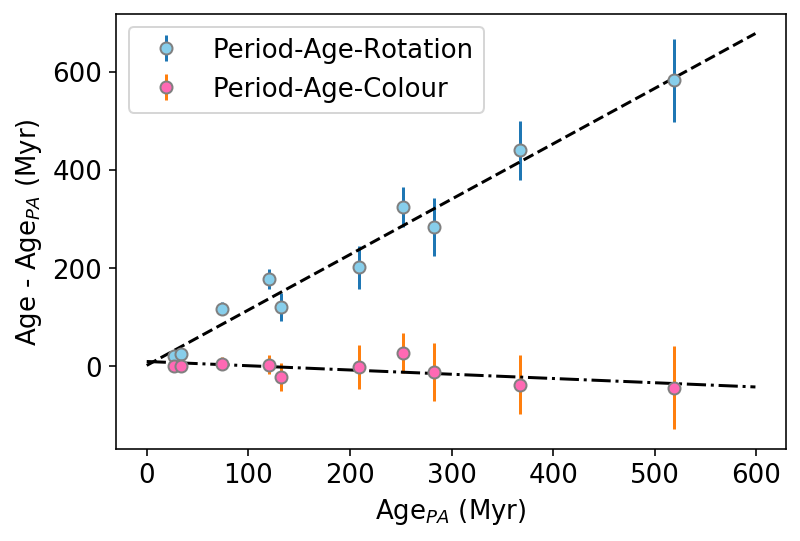

In [52]:
mp.errorbar(ages_df.Age_PA, ages_df.Age_rot - ages_df.Age_PA, yerr = ages_df.unc_Age_PA, mfc='skyblue', mec='grey', marker='o', ls='None', label='Period-Age-Rotation')
mp.errorbar(ages_df.Age_PA, ages_df.PA_PAC_Age_diff, yerr = ages_df.unc_Age_PA, mfc='hotpink', mec='grey', marker='o', ls='None', label='Period-Age-Colour')

mp.xlabel('Age$_{PA}$ (Myr)')
mp.ylabel('Age - Age$_{PA}$ (Myr)')
xs = np.arange(0,600)
mp.plot(xs, slope_rot*xs + intercept_rot, 'k--')
mp.plot(xs, slope_pac*xs + intercept_pac, 'k-.')

myaxis=[0,600,0,600]
mp.legend()


In [50]:
print(slope_pac, intercept_pac)

-0.08669792261595988 9.2869709911791


In [51]:
print(slope_rot, intercept_rot)

1.1294133899263419 1.2973192519144312


In [53]:
print(slope_pac, err_slope_pac)

-0.08669792261595988 0.0367921750227205


In [54]:
print(slope_rot, err_slope_rot)

1.1294133899263419 0.06953537678617822


In [59]:
popt, pcov = curve_fit(line,ages_df.Age_PA, ages_df.Age_rot)
slope_rot = popt[0]
intercept_rot = popt[1]
err_slope_rot = np.sqrt(float(pcov[0][0]))
err_intercept_rot = np.sqrt(float(pcov[1][1]))

Text(450, 300, 'Age = Age$_{PA}$')

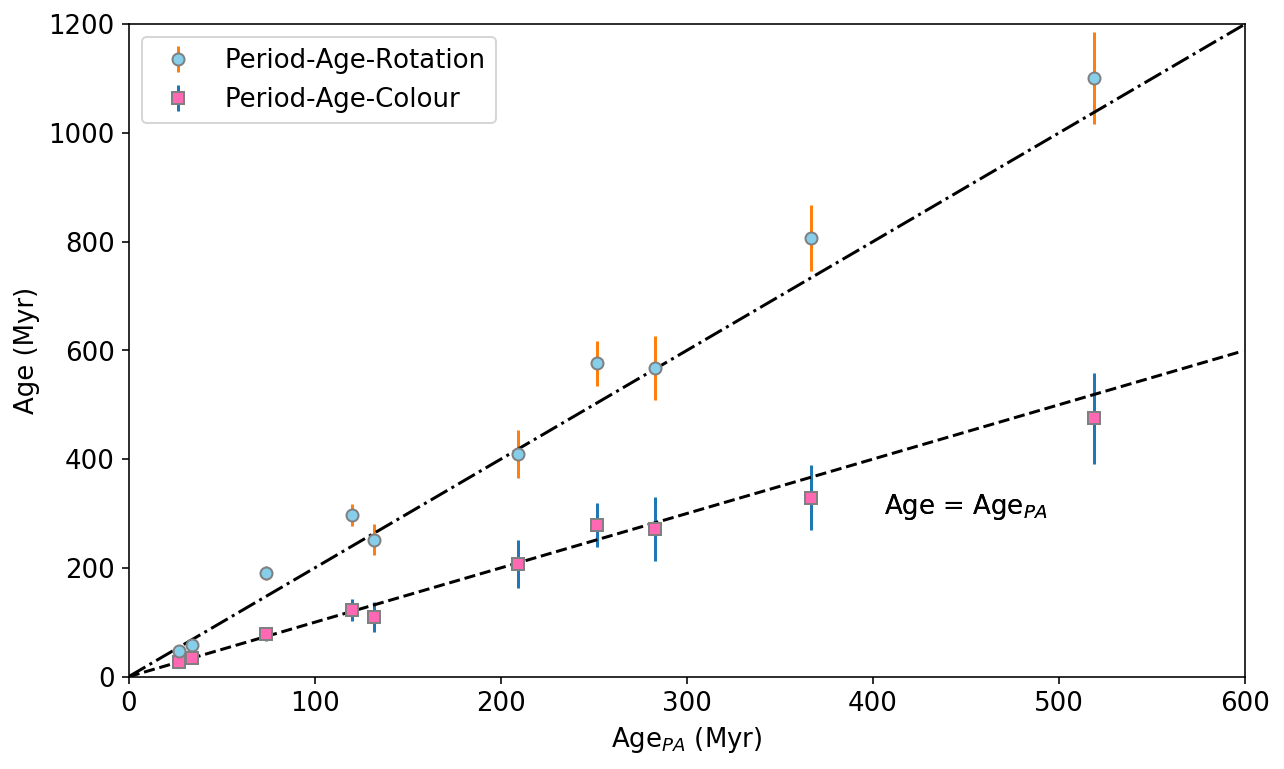

In [78]:
fig = mp.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(ages_df.Age_PA, ages_df.Age_PAC, yerr = ages_df.unc_Age_PA, mfc='hotpink', mec='grey', marker='s', ls='None', label='Period-Age-Colour')
ax.errorbar(ages_df.Age_PA, ages_df.Age_rot, yerr = ages_df.unc_Age_PA, mfc='skyblue', mec='grey', marker='o', ls='None', label='Period-Age-Rotation')

mp.xlabel('Age$_{PA}$ (Myr)')
mp.ylabel('Age (Myr)')
xs = np.arange(0,600)
ax.plot(xs,xs,'k--')
ax.plot(xs, 2*xs, 'k-.')


myaxis=[0,600,0,1200]
mp.axis(myaxis)
handles, labels = ax.get_legend_handles_labels()
mp.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)

mp.annotate('Age = Age$_{PA}$', xy=(450, 300), xycoords='data', ha='center')
mp.annotate('Age = Age$_{PA}$', xy=(450, 300), xycoords='data', ha='center')

In [61]:
print(slope_rot, err_slope_rot)

2.129413389928523 0.06953529313217563


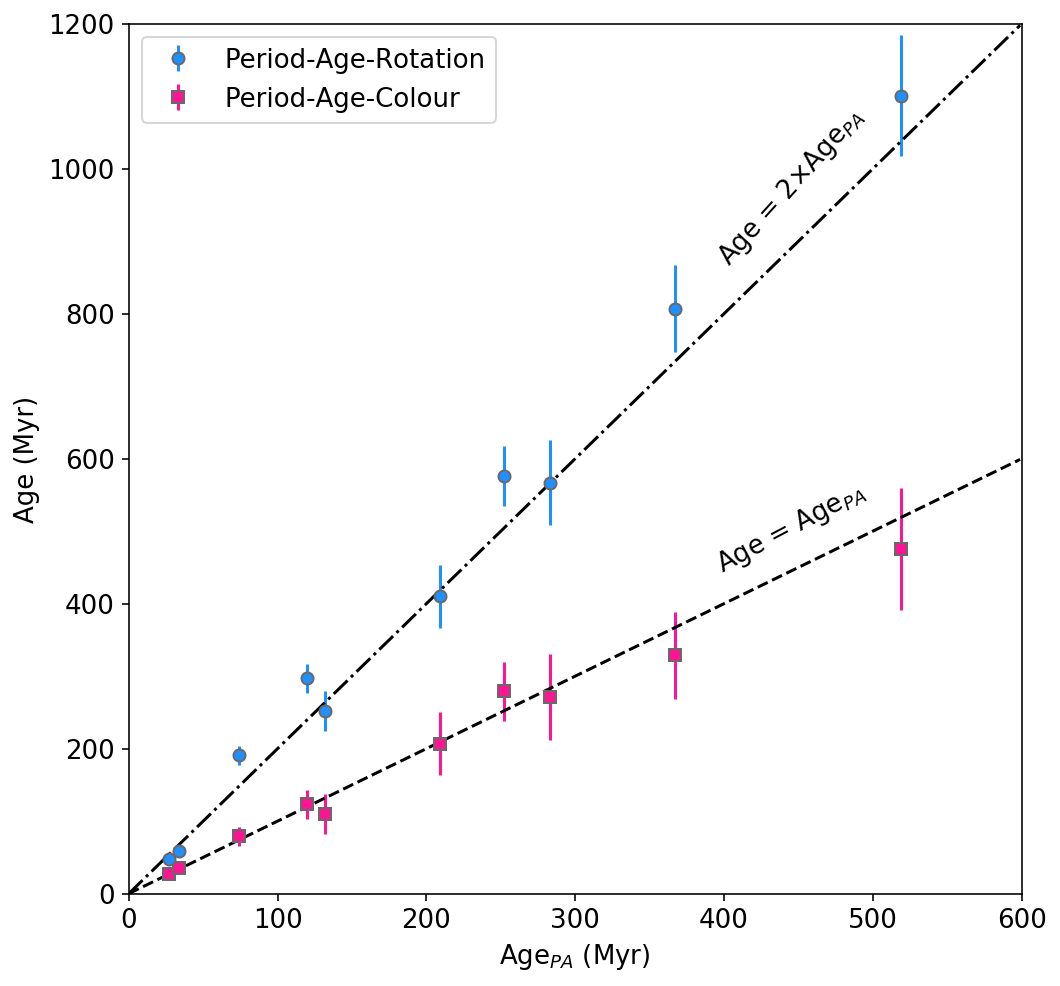

In [119]:
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(ages_df.Age_PA, ages_df.Age_PAC, yerr = ages_df.unc_Age_PA, c='deeppink', mfc='deeppink', mec='dimgrey', marker='s', ls='None', label='Period-Age-Colour')
ax.errorbar(ages_df.Age_PA, ages_df.Age_rot, yerr = ages_df.unc_Age_PA, c='dodgerblue', mfc='dodgerblue', mec='dimgrey', marker='o', ls='None', label='Period-Age-Rotation')

mp.xlabel('Age$_{PA}$ (Myr)')
mp.ylabel('Age (Myr)')
xs = np.arange(0,600)
ax.plot(xs,xs,'k--')
ax.plot(xs, 2*xs, 'k-.')


myaxis=[0,600,0,1200]
mp.axis(myaxis)
handles, labels = ax.get_legend_handles_labels()
mp.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)

mp.annotate('Age = Age$_{PA}$', xy=(445, 445), xycoords='data', ha='center', rotation=28)
annotation = r'Age = 2$\times$Age$_{PA}$'
mp.annotate(annotation, xy=(445, 870), xycoords='data', ha='center', rotation=48)
mp.show()

In [120]:
fig.savefig('age_rotation_plot.pdf')